# TO·Pi·cks:

## Forcast Consumer-Interest in Topics

__Author: Tarun Gupta  
  Company: Insight Data Science  
  Location: Toronto, ON__   
  Date: Januray 2019  
  Github: https://github.com/tguptaMT/TOPicks  
  __About:__ Powered by NLP and machine-learning based time-series forecasting, TO·Pi·cks is a consumer-engagement and popularity forecasting tool. See ReadMe file for more details. 
  
  _This is the first file in a series of Jupyter notebooks._

### Step1: Data Loading, Cleaning & Basic Analytics

- __Load Data:__ 
    - read from .xls files if sql db not available 
- __Basic Data Cleaning:__
    - Identify missing values, nan, duplicates etc. 
    - Determine aspects of this data are potentially useful.
    - Save cleaned up version in a SQLite3 db file.
- __Basic Data Analytics:__
    - How did different news organizations engage with social media over the last 5-6 years?
    - What are the metrics of popularity and user-engagement and how are they distributed?
    - What are some of the interesting aspects of this data?

#### Import Dependencies

In [1]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import sqlite3
import warnings
from joblib import dump

warnings.simplefilter("ignore")

#### Import Raw Data to DataFrame

In [2]:
# Walk through subdirectories and import .xls data files
print("\nLoading social media news links data from .csv files...")

tmp_list = []
for root, subFolders, listfiles in os.walk('data/xls_data/'):
    for file_ in tqdm([x for x in listfiles if x.endswith('.xls')], unit=' iteration'):
        print("Importing", file_)
        try:
            data_tmp = pd.read_excel(os.path.join(root, file_), header=0, sort=True)
            # Extract news source name from the file name for later analysis by source
            news_source = re.sub('[\W]', '_', re.findall(r'^[a-zA-Z]*[\D]*[a-zA-Z]*[\D]*[a-zA-Z]*', file_)[0]).rstrip('_')
            data_tmp['source'] = news_source
        except UnicodeDecodeError:
            print("UnicodeDecodeError: ", file_, "not imported")
            continue
        tmp_list.append(data_tmp)

# Combine data from all files in a single DataFrame
all_data = pd.concat(tmp_list,axis=0, join='outer', ignore_index=False, sort=True)

# Select variables of interest for analysis:
vars_interest = ['posted_at', 'source', 'name', 'description', 'likes_count',\
                 'comments_count', 'shares_count','post_type', 'link', 'id']

all_data = all_data[vars_interest]
all_data.rename(columns={'name': 'headline', 'posted_at': 'date'}, inplace=True)
display(all_data.head(5))


  0%|          | 0/14 [00:00<?, ? iteration/s]


Loading social media news links data from .csv files...
Importing the-washington-post-6250307292.xls


  7%|▋         | 1/14 [00:06<01:25,  6.60s/ iteration]

Importing usa-today-13652355666.xls


 14%|█▍        | 2/14 [00:13<01:19,  6.60s/ iteration]

Importing npr-10643211755.xls


 21%|██▏       | 3/14 [00:19<01:12,  6.61s/ iteration]

Importing nbc-news-155869377766434.xls


 29%|██▊       | 4/14 [00:27<01:09,  6.94s/ iteration]

Importing the_los_angeles_times_5863113009.xls


 36%|███▌      | 5/14 [00:32<00:57,  6.35s/ iteration]

Importing the-huffington-post-18468761129.xls


 43%|████▎     | 6/14 [00:44<01:03,  7.93s/ iteration]

Importing cbs-news-131459315949.xls


 50%|█████     | 7/14 [00:50<00:52,  7.44s/ iteration]

Importing time-10606591490.xls


 57%|█████▋    | 8/14 [00:53<00:36,  6.16s/ iteration]

Importing cnn-5550296508.xls


 64%|██████▍   | 9/14 [00:59<00:29,  5.95s/ iteration]

Importing bbc-228735667216.xls


 71%|███████▏  | 10/14 [01:02<00:21,  5.28s/ iteration]

Importing abc-news-86680728811.xls


 79%|███████▊  | 11/14 [01:10<00:17,  5.92s/ iteration]

Importing the-new-york-times-5281959998.xls


 86%|████████▌ | 12/14 [01:18<00:13,  6.76s/ iteration]

Importing the-wall-street-journal-8304333127.xls


 93%|█████████▎| 13/14 [01:25<00:06,  6.62s/ iteration]

Importing fox-news-15704546335.xls


100%|██████████| 14/14 [01:30<00:00,  6.28s/ iteration]


,date,source,headline,description,likes_count,comments_count,shares_count,post_type,link,id
0,2012-02-26 14:07:07,the_washington_post,How the Catholic Church almost came to accept ...,These battles were already won — decades ago.,298,142,203,link,http://www.washingtonpost.com/opinions/how-the...,"﻿""6250307292_277600095646903"""
1,2012-02-26 15:15:26,the_washington_post,Arizona Gov. Jan Brewer endorses Mitt Romney,Brewer’s backing comes as Romney holds a sizea...,105,114,21,link,http://www.washingtonpost.com/blogs/election-2...,"﻿""6250307292_370040396348101"""
2,2012-02-26 17:11:48,the_washington_post,Scotland moves toward vote on independence,The nationalist push is emerging as the greate...,318,49,176,link,http://www.washingtonpost.com/world/scotland-m...,"﻿""6250307292_198588973576564"""
3,2012-02-26 18:14:57,the_washington_post,Santorum says he ‘almost threw up’ after readi...,Former senator on Sunday defended a past state...,224,437,317,link,http://www.washingtonpost.com/blogs/election-2...,"﻿""6250307292_329394960429445"""
4,2012-02-26 20:28:56,the_washington_post,"Beautiful or bizarre, Oscar’s iconic gowns tra...",Few looks donned at the Oscars live on after t...,125,18,46,link,http://www.washingtonpost.com/lifestyle/style/...,"﻿""6250307292_298155863583341"""


#### Data Exploration and Housekeeping:

,likes_count,comments_count,shares_count
post_type,,,
event,152.00,152.00,152.00
link,411424.00,411424.00,411424.00
music,12.00,12.00,12.00
note,2.00,2.00,2.00
offer,2.00,2.00,2.00
photo,45838.00,45838.00,45838.00
status,11016.00,11016.00,11016.00
video,40133.00,40133.00,40133.00


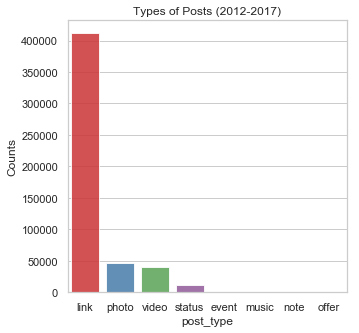

In [3]:
# Check News counts for each post type to explore which post types to retain for further analysis
plt.rc('figure', figsize=(5,5));
display(all_data.groupby('post_type')['likes_count', 'comments_count', 'shares_count'].count().style\
    .apply(lambda s: ['background-color: yellow' if v == s.max() else '' for v in s])\
    .apply(lambda s: ['color: red' if v == s.min() else '' for v in s])\
    .format("{:.2f}"))

posts = all_data.groupby('post_type')['id']\
        .count()\
        .reset_index(name='Counts')\
        .sort_values(['Counts'], ascending=False)\

sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set1"))
display(sns.barplot(x='post_type', y='Counts', data=posts, alpha=0.85))
plt.title("Types of Posts (2012-2017)");

__This graph highlights that news media organizations are primarily using social media to post links that direct traffic back to their own platforms.__

#### Basic pre-processing: missing values and duplicates

In [4]:
# convert date to datetime object
all_data['date'] = pd.to_datetime(all_data['date']).dt.round('S')
all_data['month'] = all_data['date'].dt.round('30D') # Extract month

In [5]:
# Check for NaN or missing values or duplicates:
print("Missing values in linked posts: \n{}".format(all_data[all_data['post_type']=='link'].isnull().sum()))

Missing values in linked posts: 
date                  0
source                0
headline            102
description       17700
likes_count           0
comments_count        0
shares_count          0
post_type             0
link                  8
id                    0
month                 0
dtype: int64


For posts with weblinks that direct traffic back to the source website, there are ~17,800 rows with something missing: Majority of them are rows with description missing and a verty few with headlines missing.

In [6]:
# Delete the rows that do not have headlines or corresponding weblinks. 
## Keep the ones with no description.
all_data = all_data.dropna(subset=['headline', 'link'], axis=0, how='any')
print(all_data[all_data['post_type']=='link'].isnull().sum())

date                  0
source                0
headline              0
description       17698
likes_count           0
comments_count        0
shares_count          0
post_type             0
link                  0
id                    0
month                 0
dtype: int64


In [7]:
# Identify and remove True duplicates, where the whole row is the same 
# (not the ones where same story was linked to multiple times on separate occasions)
print("There are {} true duplicates.".format(len(all_data[all_data.duplicated(keep=False)])))

There are 0 true duplicates.


##### Retain data only from linked news articles that drive traffic back to the source

In [8]:
# Exclude posts with music, notes, events, status updates etc.
## Also remove Photos and Videos because people likely look at the visual content directly as opposed to the headlines 
### given that photos and videos appear prominently when shared on facebook.
data_nopv = all_data[all_data['post_type']=='link']

#### Examine Multiple Postings for the same story by the same news organization:

In [9]:
print("There are {} duplicate values with exact same headlines from the same source. Of these {} are unique stories."\
      .format(len(data_nopv[data_nopv[['headline', 'source']].duplicated(keep=False)]),
              len(data_nopv[data_nopv[['headline', 'source']].duplicated(keep='first')])))
#data_nopv[data_nopv[['headline', 'source']].duplicated(keep=False)].sort_values(by='headline').tail()

There are 36359 duplicate values with exact same headlines from the same source. Of these 22002 are unique stories.


__There are 34873 duplicate values with exact same headlines from the same source. Of these 21093 are unique stories and the remaining are redundant.__ Most of these duplicates seem to be instances where the same story was posted multiple times in quick successsion of each other or within  1-2 days. The user-engagement (number of likes/comments etc.) each of those duplicate posts gathered varies quite a bit from each other which somewhat reaffirms one of the feedback points I received at Insight - that news popularity is highly time-dependent and on what's going on at a given point in time in the news cycle. 

So, some of the potential ways of dealing with this are to -   
__a)__ retain all the duplicate headlines with their exact time stamps,  
__b) retain only the story with the highest number of likes/comments/shares etc.__  
__c)__ collapse all these stories and take an average of popularity metrics.

I am going to propose going with the option b i.e. retaining the story with the highest number of likes/comments/shares etc. *with the assumption that it represents the best performance metric that particular story would have performed given it's placement at that specific time points in the news cycle were it posted just once.*

In [10]:
# Remove duplicates: retain the ones with maximum # of likes (as likes correlate strongly with both shares and comments)
## sorting by headline and likes would place the posts with the most # of likes at the top for each duplicate post. 
### Then we can just keep the top post from each duplicate set.
#### Make sure their source is different before removing dusplicates as sometimes different sources use exactly same headline.

data_nopv.sort_values(by=['headline', 'likes_count'],axis=0, ascending=False, inplace=True)
data_nopv.drop_duplicates(subset=['headline', 'source'], keep='first', inplace=True)

# confirm that all duplicates were removed.
print("There are {} duplicate values with exact same headlines from the same source."
      .format(len(data_nopv[data_nopv[['headline', 'source']].duplicated(keep=False)])))

There are 0 duplicate values with exact same headlines from the same source.


##### Identify and exclude instances where the link headline sets an explicit and primary expectation to see a photo or a video.

In [11]:
links_pv = len(data_nopv[data_nopv['headline'].str.contains(r"((photo|video)[s]{0,1})|(watch|look:)", case=False)])
#data_nopv = data_nopv[~data_nopv['headline'].str.contains(r"((photo|video)[s]{0,1})|(watch|look:)", case=False)]
print("{} links primarily linked to photos videos were removed. New data has {} rows".format(links_pv, len(data_nopv)))

19863 links primarily linked to photos videos were removed. New data has 389312 rows


#### Save dataframe to sqlite

In [13]:
# Export processed data to Sql database:
key = 'data_nopv'
db_name = 'data/sql_data/News_headlines_facebook.db'
print("\nExporting to sql database:. ", db_name)
conn = sqlite3.connect(db_name)
data_nopv.to_sql(key, conn, if_exists='fail')
conn.close()

__Step 2: 

### Examine how different news organizations engaged with social media over the years 

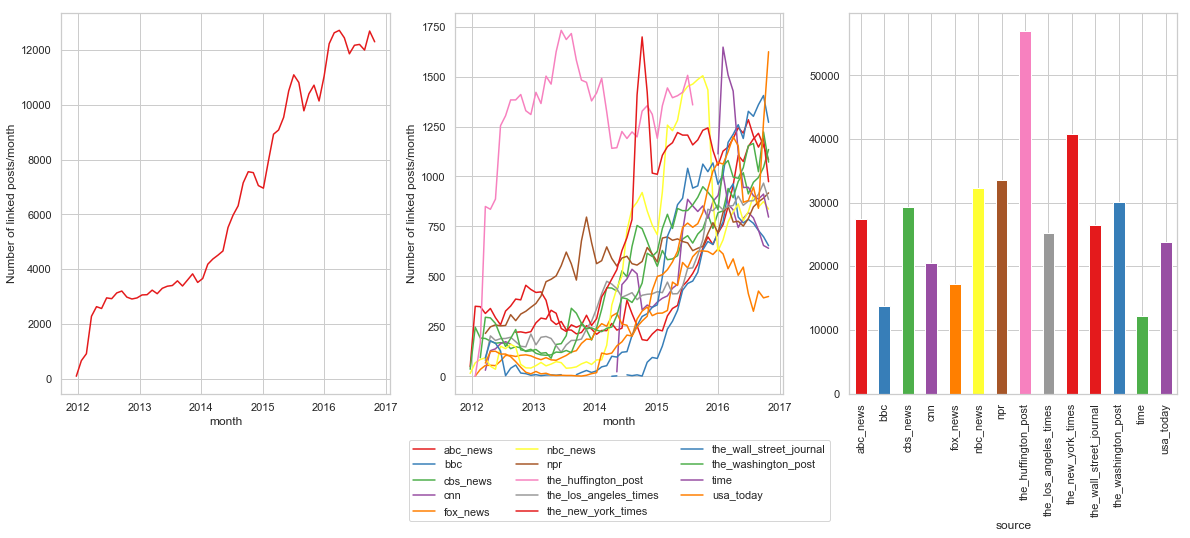

In [29]:
# number of all linked posts (not posttype photo/video):
plt.rc('figure', figsize=(20, 7))
ax=plt.subplot(131)
data_nopv.groupby('month')['id'].count().plot(ax=ax) # total # of linked articles / month on FB
ax.set_ylabel('Number of linked posts/month')
ax=plt.subplot(132)
data_nopv.groupby(['month', 'source'])['id'].count().unstack().plot(ax=ax)
ax.set_ylabel('Number of linked posts/month')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.35), ncol=3, fancybox=True, shadow=False)
ax.set_ylabel('Number of linked posts/month')
data_nopv.groupby('source')['id'].count().plot.bar(ax=plt.subplot(133)) # link counts for each source


__Fig 1 demonstrates a dramatic increase in the total number of articles marketed on the social media per month over a period of 6 years from 2012-2017. Figure 2 and 3 demonstrate how some of the major news organizations adopted social media, specifically facebook, for marketing their stories / articles much earlier than others and that these organizations have gone through restructuring their social-media priorities over time.__

#### What are the metrics of popularity and User-engagement?

In [15]:
data_nopv[['likes_count', 'comments_count', 'shares_count']].describe()

,likes_count,comments_count,shares_count
count,389312.000000,389312.000000,389312.000000
mean,2446.708866,334.066661,627.700446
std,7487.122267,1039.617078,2131.861681
min,0.000000,0.000000,0.000000
25%,266.000000,38.000000,50.000000
50%,694.000000,101.000000,146.000000
75%,2029.000000,274.000000,462.000000
max,506909.000000,103067.000000,197804.000000


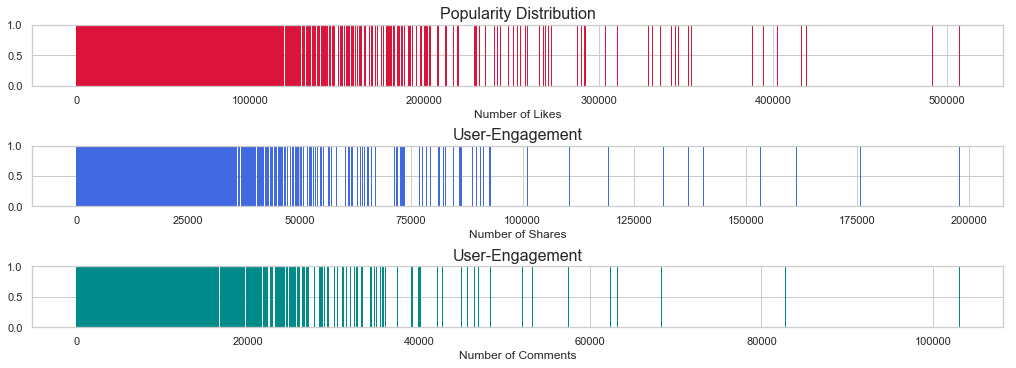

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(14, 5), constrained_layout=True)
sns.rugplot(data_nopv['likes_count'], height=1, ax=axs[0], color='crimson')
axs[0].set_title('Popularity Distribution', fontsize=16)
axs[0].set_xlabel('Number of Likes');

sns.rugplot(data_nopv['shares_count'], height=1, ax=axs[1], color='royalblue')
axs[1].set_title('User-Engagement: Shares', fontsize=16)
axs[1].set_xlabel('Number of Shares');

sns.rugplot(data_nopv['comments_count'], height=1, ax=axs[2], color='darkcyan')
axs[2].set_title('User-Engagement: Comments', fontsize=16)
axs[2].set_xlabel('Number of Comments');

Text(0,0.5,'Number of links')

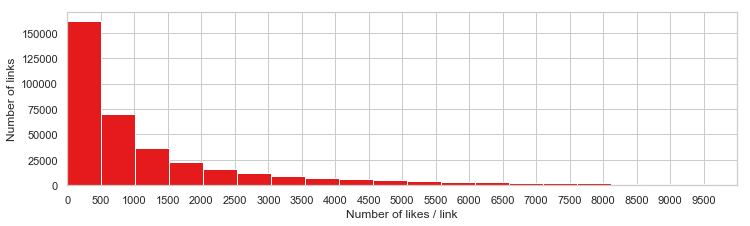

In [22]:
# Examine the distribution in more detail
plt.rc('figure', figsize=(12,7))
plt.subplot(211)
plt.hist(data_nopv['likes_count'], bins=1000)
plt.xlim(0, 10000)
plt.xticks(np.arange(0, 10000, 500))
plt.xlabel("Number of likes / link")
plt.ylabel("Number of links")

Text(0.5,1,'Median User Engagement Counts / Story')

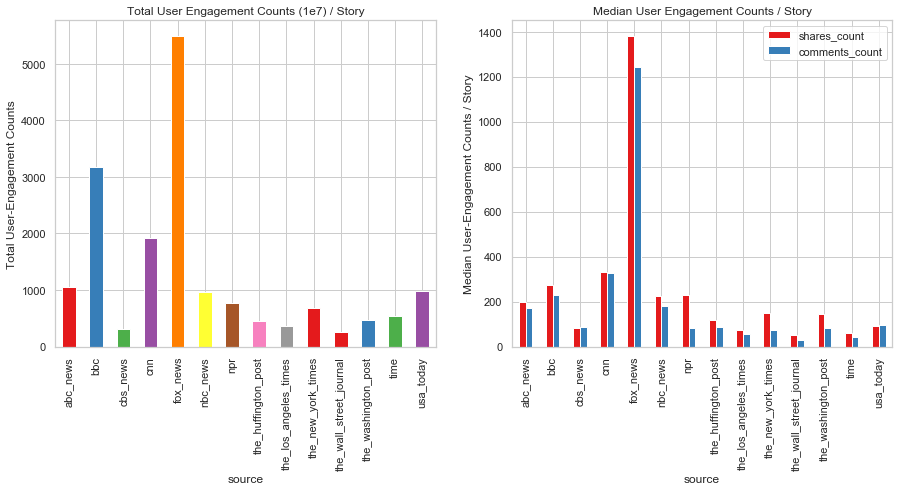

In [25]:
# Level of user engagement from 2012-17 for each source
plt.rc('figure', figsize=(15, 6))
ax1=plt.subplot(121)
data_nopv.groupby(['source'])['likes_count'].median().plot.bar(ax=ax1)
ax1.set_ylabel('Total User-Engagement Counts')
plt.title("Total User Engagement Counts (1e7) / Story")
ax2=plt.subplot(122)
data_nopv.groupby(['source'])['shares_count', 'comments_count'].median().plot.bar(ax=ax2)
ax2.set_ylabel('Median User-Engagement Counts / Story')
plt.title("Median User Engagement Counts / Story")


__ Observations / Questions:__
- What is it about fox news stories that they are so highly popular compared to all other new media sources? How do such high value stories distribute over time? What topics are they about compared to stories that are mostly ignored?
- __ Can I predict popularity or likely user-engagement for a topic given some information about the source and the nature of the content? __ 

__I'll explore these questions with natural_language_processing in step2_topic_modeling.ipynb__